In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

In [2]:
insurance = pd.read_csv('/Users/olgazdanova/Downloads/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(insurance.shape)

(1338, 7)


In [4]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Пропуски отсутствуют 

In [5]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
copy_data = insurance.copy()
types = copy_data.dtypes

In [7]:
num_features = list(types[(types != 'object')].index)
num_features

['age', 'bmi', 'children', 'charges']

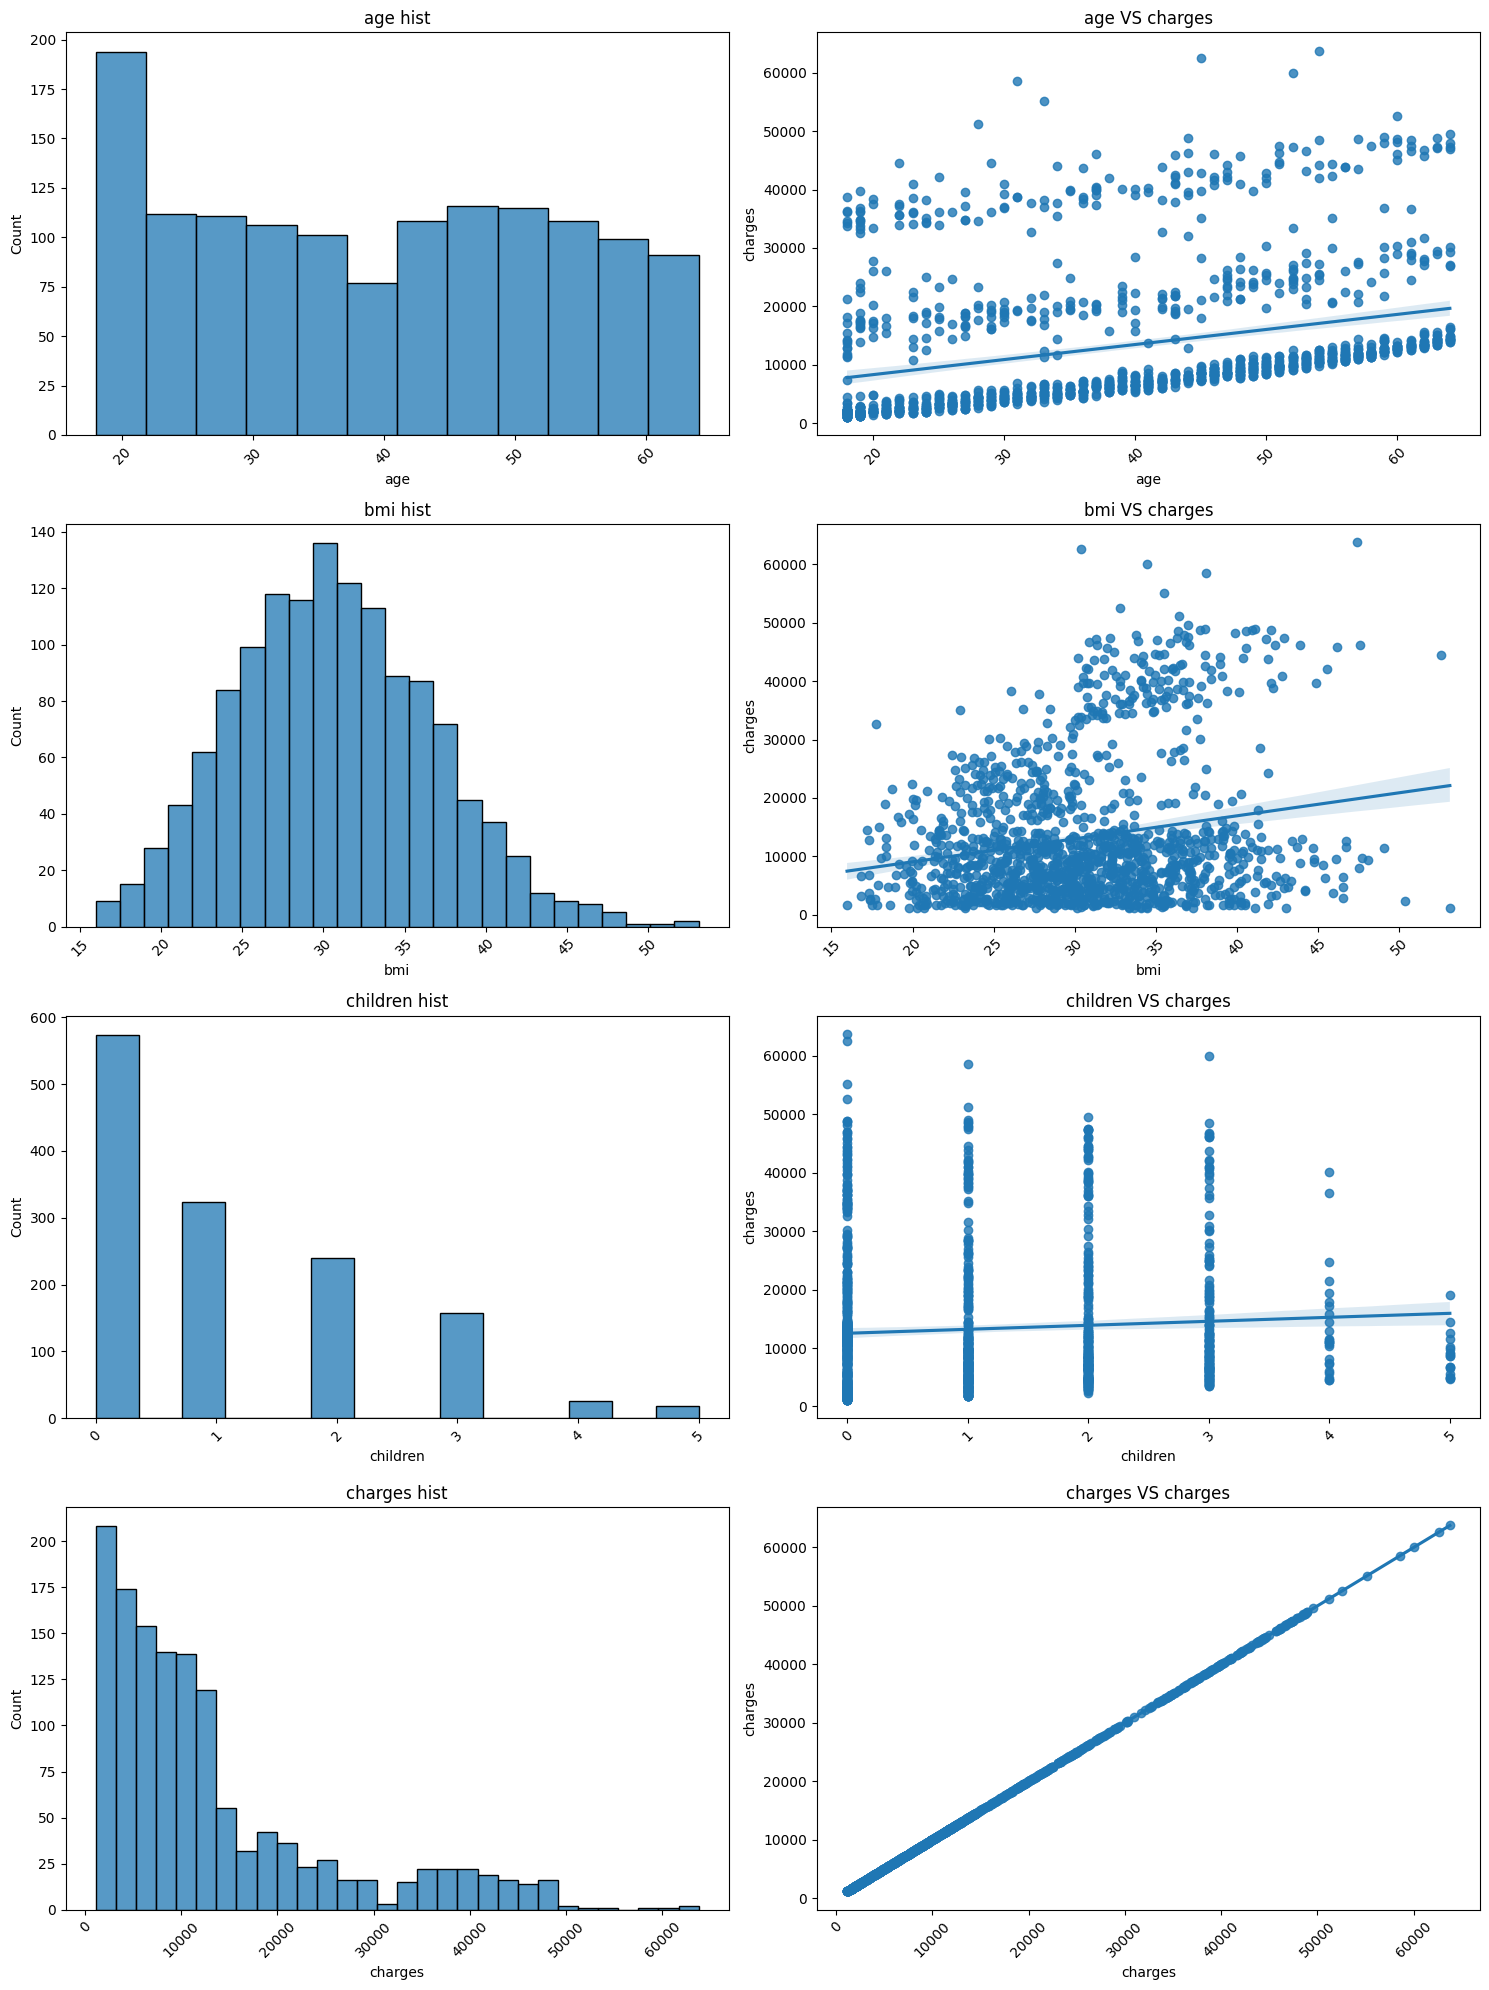

In [8]:
n = len(num_features) #количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(num_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака 
    histplot = sns.histplot(data=copy_data, x=feature, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейную регрессию
    regplot = sns.regplot(data=copy_data, x=feature, y='charges', ax=axes[i][1])
    #Добавляем подпись графику
    regplot.set_title('{} VS charges'.format(feature));
    #Добавляем поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

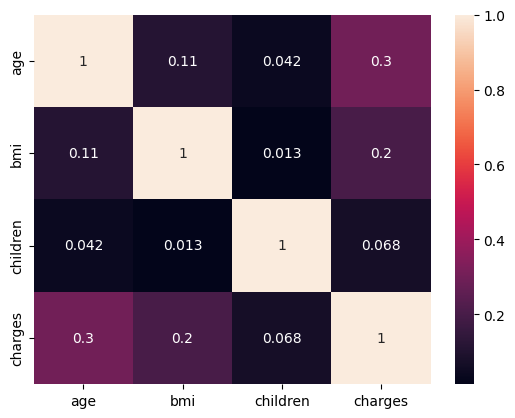

In [9]:
sns.heatmap(copy_data[num_features].corr(), annot=True);

In [10]:
copy_data['smoker'] = copy_data['smoker'].apply(lambda x: 0 if x=='no' else 1)
copy_data['sex'] = copy_data['sex'].apply(lambda x: 0 if x=='female' else 1)
copy_data = pd.get_dummies(copy_data)
copy_data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [11]:
features = copy_data.drop('charges', axis=1).columns
X = copy_data[features]
y = copy_data['charges']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.shape

(268, 9)

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.intercept_)

-12390.804294570282


In [16]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('Train R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))
print(f'Train MAE: {mean_absolute_error(y_train, y_train_pred)}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, y_train_pred)*100}')
print('Test R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print(f'Test MAE: {mean_absolute_error(y_test, y_test_pred)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, y_test_pred)*100}')

Train R2: 0.742
Train MAE: 4208.234572492218
Train MAPE: 42.202685080316286
Test R2: 0.784
Test MAE: 4181.194473753641
Test MAPE: 46.88825597914663


In [18]:
mms = MinMaxScaler()
mms.fit(X_train, y_train)
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)
X_train_scaled_poly.shape, X_test_scaled_poly.shape

((1070, 54), (268, 54))

In [19]:
lr_p = LinearRegression()
lr_p.fit(X_train_scaled_poly, y_train)
y_test_pred = lr_p.predict(X_test_scaled_poly)
print('Test T2 score: {:.3f}'.format(r2_score(y_test, y_test_pred)))


Test T2 score: 0.867


In [20]:
print(lr_p.coef_)

[ 2849.35067435  -417.24034999  5935.92169643  4636.08544526
  1139.1491985    351.86496094  -366.48563336   227.08922666
  -212.46855424  8399.63608632   812.46558472   995.68651894
 -1666.91118191   172.50303109  -848.02252419   280.84325571
  1455.92298005  1960.60696278  -417.24034999   647.47475622
 -1238.19812114   257.33745404  -966.67881613   311.8232212
   544.21466602  -306.59942109 -9711.00034091  1559.87212018
 54839.212545    3782.01457236  2765.86075737  -794.72610916
   182.77247586 -2090.61756751 -2233.48411893  2438.06291171
  2463.6574199    410.25306251  -675.88794885  1139.1491985
   318.56157022  -298.80831333  -589.98196067  1709.37790228
   351.86496094     0.             0.             0.
  -366.48563336     0.             0.           227.08922666
     0.          -212.46855424]


In [21]:
lasso = Lasso(max_iter=2000)
lasso.fit(X_train_scaled_poly, y_train)
y_test_pred = lasso.predict(X_test_scaled_poly)
y_train_pred = lasso.predict(X_train_scaled_poly)

print('Test R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print(f'Test MAE: {mean_absolute_error(y_test, y_test_pred)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, y_test_pred)*100}')

Test R2: 0.867
Test MAE: 2719.3341297308834
Test MAPE: 30.06989857581762


In [22]:
ridge = Ridge()
ridge.fit(X_train_scaled_poly, y_train)
y_test_pred = ridge.predict(X_test_scaled_poly)
y_train_pred = ridge.predict(X_train_scaled_poly)

print('Test R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print(f'Test MAE: {mean_absolute_error(y_test, y_test_pred)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, y_test_pred)*100}')

Test R2: 0.863
Test MAE: 2860.5545396470634
Test MAPE: 31.37974995231101
